# **Latihan Analisis Data Menggunakan Google Colab**

Latihan ini merupakan bagian pembelajaran semata untuk melihat implementasi coding/programming menggunakan Python dan Google Colab. Data diunduh dari https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction/data?select=dfTransjakarta.csv

Versi terakhir 3 November 2025.

## (1) Tahapan Persiapan

### Memuat library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import folium

### Mengunggah dataset yang akan dipakai

In [3]:
# Option A: direct upload
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('dfTransjakarta.csv')

Saving dfTransjakarta.csv to dfTransjakarta.csv


Bila sudah menggunakan opsi A, opsi ini bisa diabaikan/dilewati.

In [ ]:
# Option B: if stored in Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dfTransjakarta.csv')

In [ ]:
# Option C: Jika file ada di URL publik

url = 'https://example.com/path/to/dfTransjakarta.csv'
df = pd.read_csv(url)

print(f"Data shape: {df.shape}")
print(df.head())

### Memeriksa data yang sudah terunggah

In [4]:
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,37900,3.790000e+04,37900,37900,37900,37900.000000,36643,35970,37900.000000,36687,...,37900.000000,37900.000000,37900,35611,36556,36556.000000,36556.000000,36556.000000,36556,36893.000000
unique,37900,NaN,6,1993,2,NaN,221,216,NaN,2570,...,NaN,NaN,37079,2230,2248,NaN,NaN,NaN,35908,NaN
top,FMZZ963S4B68ZP,NaN,dki,Fathonah Saefullah,F,NaN,1T,Cibubur - Balai Kota,NaN,P00170,...,NaN,NaN,2023-04-06 17:35:40,P00016,BKN,NaN,NaN,NaN,2023-04-17 18:14:19,NaN
freq,1,NaN,18743,80,20157,NaN,400,391,NaN,236,...,NaN,NaN,3,306,316,NaN,NaN,NaN,3,NaN
mean,NaN,4.250060e+17,NaN,NaN,NaN,1990.089314,NaN,NaN,0.500633,NaN,...,106.841554,13.572480,NaN,NaN,NaN,-6.214651,106.841233,21.219909,NaN,2699.712683
std,NaN,1.321699e+18,NaN,NaN,NaN,13.051482,NaN,NaN,0.500006,NaN,...,0.060369,12.237623,NaN,NaN,NaN,0.059022,0.060999,13.800689,NaN,4212.225592
min,NaN,6.040368e+10,NaN,NaN,NaN,1946.000000,NaN,NaN,0.000000,NaN,...,106.614730,0.000000,NaN,NaN,NaN,-6.394973,106.614730,1.000000,NaN,0.000000
25%,NaN,1.800442e+14,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,...,106.803470,4.000000,NaN,NaN,NaN,-6.247225,106.801750,11.000000,NaN,0.000000
50%,NaN,3.507947e+15,NaN,NaN,NaN,1990.000000,NaN,NaN,1.000000,NaN,...,106.834830,10.000000,NaN,NaN,NaN,-6.214718,106.834580,18.000000,NaN,3500.000000
75%,NaN,4.699023e+15,NaN,NaN,NaN,2001.000000,NaN,NaN,1.000000,NaN,...,106.882270,19.000000,NaN,NaN,NaN,-6.174736,106.883030,29.000000,NaN,3500.000000


### Drop missing value

In [5]:
df_droped = df.dropna()
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           31730 non-null  object 
 1   payCardID         31730 non-null  int64  
 2   payCardBank       31730 non-null  object 
 3   payCardName       31730 non-null  object 
 4   payCardSex        31730 non-null  object 
 5   payCardBirthDate  31730 non-null  int64  
 6   corridorID        31730 non-null  object 
 7   corridorName      31730 non-null  object 
 8   direction         31730 non-null  float64
 9   tapInStops        31730 non-null  object 
 10  tapInStopsName    31730 non-null  object 
 11  tapInStopsLat     31730 non-null  float64
 12  tapInStopsLon     31730 non-null  float64
 13  stopStartSeq      31730 non-null  int64  
 14  tapInTime         31730 non-null  object 
 15  tapOutStops       31730 non-null  object 
 16  tapOutStopsName   31730 non-null  object 
 17

## (2) Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah proses memeriksa dan memahami data secara mendalam dengan menggunakan statistik dan visualisasi. Tujuannya adalah untuk menemukan pola, anomali, hubungan, dan struktur dalam data tanpa membuat asumsi awal. EDA membantu dalam merumuskan hipotesis, memvalidasi asumsi, dan memandu langkah-langkah analisis selanjutnya.

Langkah-langkah umum dalam EDA:

1.    Memahami Data: Melihat struktur data, jumlah baris dan kolom, tipe data, dll.

2.    Pembersihan Data: Menangani missing values, outlier, duplikat, dll.

3.    Analisis Statistik Deskriptif: Menghitung mean, median, modus, standar deviasi, dll.

4.    Visualisasi Data: Membuat plot seperti histogram, box plot, scatter plot, heatmap, dll.

5.    Menemukan Hubungan: Melihat korelasi antara variabel, mengidentifikasi pola, dll.



EDA sangat penting karena memberikan wawasan awal yang berharga sebelum membangun model machine learning atau melakukan analisis statistik yang lebih kompleks.

### Siapkan dataset yang sudah bersih untuk analisis

In [6]:
# Kita buat duplikat data frame
df1 = df_droped.copy()

# View columns
df1.columns

# Preview dataset
df1.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


### Konversi datetime dalam format waktu

In [7]:
df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])

# Extract time and day features
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour
df1['tapDay'] = df1['tapInTime'].dt.dayofweek
df1.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,0


### Ubah tapday menjadi hari

In [8]:
df1['tapDay'] = df1['tapDay'].replace({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
df1.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday


### Melihat demografi pengguna

In [9]:
customer = df1[['payCardName', 'payCardBirthDate', 'payCardBank', 'payCardSex']]
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       31730 non-null  object
 1   payCardBirthDate  31730 non-null  int64 
 2   payCardBank       31730 non-null  object
 3   payCardSex        31730 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


Setiap kali pengguna melakukan transaksi (tap) mewakili satu trip perjalanan, dengan demikian pengguna bisa muncul datanya berulang kali.

### Menghapus duplikasi data pengguna

In [10]:
customer = customer.drop_duplicates(subset='payCardName', keep='first', ignore_index=True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       1917 non-null   object
 1   payCardBirthDate  1917 non-null   int64 
 2   payCardBank       1917 non-null   object
 3   payCardSex        1917 non-null   object
dtypes: int64(1), object(3)
memory usage: 60.0+ KB


### Menghitung usia pengguna

In [11]:
# Data diperoleh pada 2023
customer['age'] = 2023 - customer['payCardBirthDate']
customer.head()

,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,Bajragin Usada,2008,emoney,M,15
1,Gandi Widodo,1997,dki,F,26
2,Emong Wastuti,1992,dki,F,31
3,Surya Wacana,1978,flazz,F,45
4,Embuh Mardhiyah,1982,flazz,M,41


### Melihat kartu yang digunakan

In [12]:
cust_bank = customer['payCardBank'].value_counts().reset_index(name='count')
cust_bank

,payCardBank,count
0,dki,945
1,emoney,361
2,flazz,163
3,brizzi,156
4,bni,148
5,online,144


Menampilkan dalam bar chart.

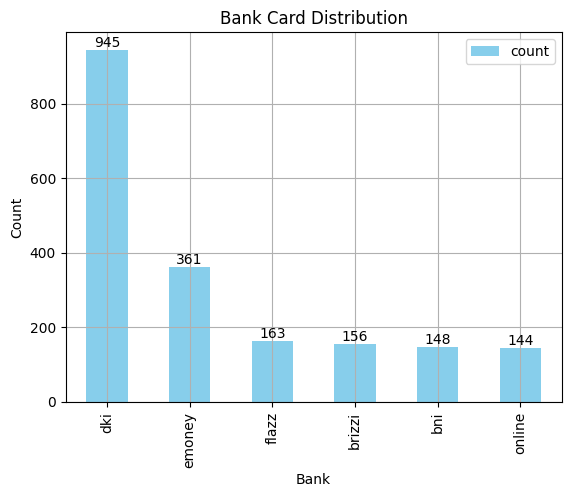

In [13]:
ax = cust_bank.plot(x='payCardBank', kind='bar', color='skyblue')

# Add text labels
for i, v in enumerate(cust_bank['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Bank')
plt.ylabel('Count')
plt.title('Bank Card Distribution')
plt.show()

Menampilkan dalam pie chart.

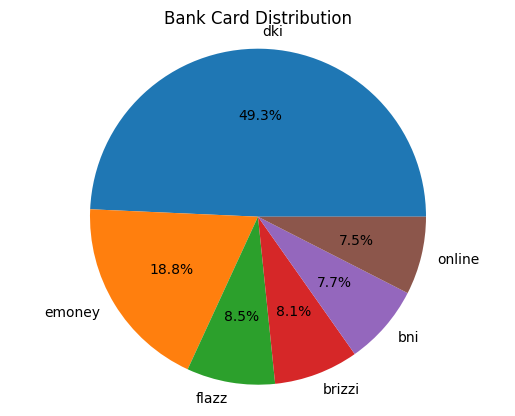

In [14]:
plt.pie(cust_bank['count'], labels=cust_bank['payCardBank'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Bank Card Distribution')
plt.show()

Menambahkan kolom persentase.


In [15]:
cust_bank['percentage'] = (cust_bank['count'] / cust_bank['count'].sum()) * 100
cust_bank

,payCardBank,count,percentage
0,dki,945,49.295775
1,emoney,361,18.831508
2,flazz,163,8.502869
3,brizzi,156,8.137715
4,bni,148,7.720396
5,online,144,7.511737


### Distribusi usia pelanggan

In [16]:
cust_age = customer[['payCardName', 'age']].groupby('age').size().reset_index(name='count')
cust_age

,age,count
0,11,37
1,12,36
2,13,39
3,14,34
4,15,46
...,...,...
61,72,4
62,74,2
63,75,3
64,76,2


Menampilkan dalam line chart.

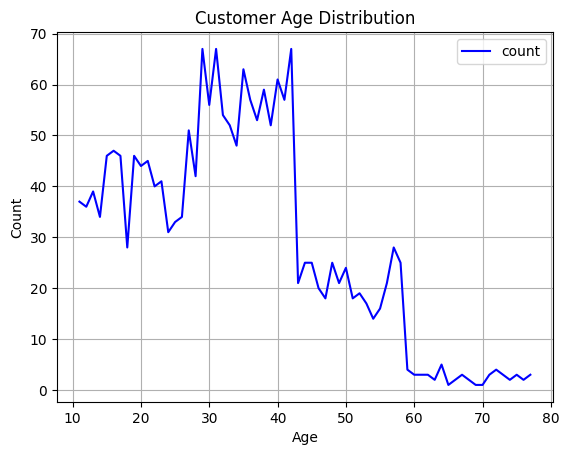

In [17]:
ax = cust_age.plot(x='age', kind='line', color='blue')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Distribution')
plt.show()

### Distribusi jenis kelamin pelanggan

In [18]:
cust_sex = (
    customer.groupby(['payCardSex', 'age'])['payCardName']
    .count()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

cust_sex.groupby('payCardSex').size()

,0
payCardSex,
F,55
M,64


Visualisasikan dalam chart.

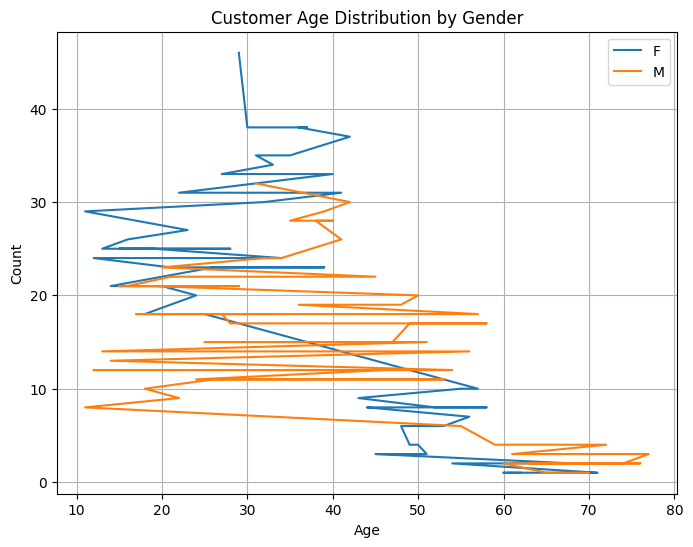

In [19]:
plt.figure(figsize=(8,6))
for sex in cust_sex['payCardSex'].unique():
    subset = cust_sex[cust_sex['payCardSex'] == sex]
    plt.plot(subset['age'], subset['count'], label=sex)

plt.legend()
plt.title('Customer Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

### Menunjukkan distribusi jumlah transaksi (tap in/out) per jam.

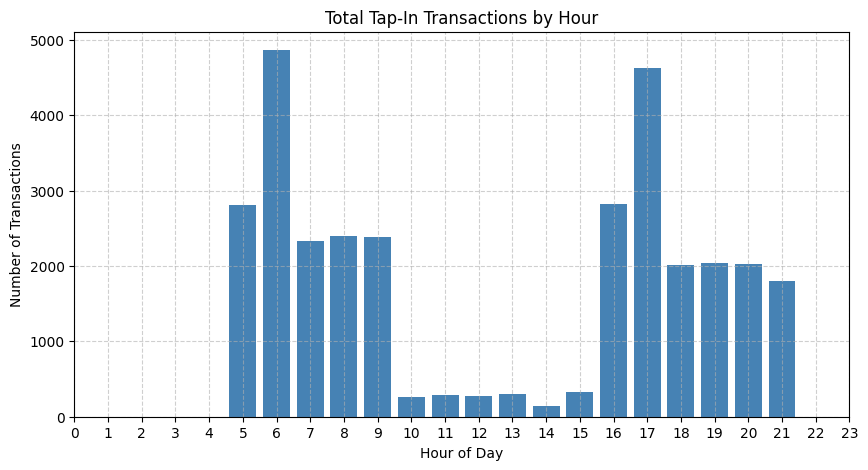

In [20]:
# Transactions per hour (tap-in)
trans_by_hour = df1.groupby('tapInHour').size().reset_index(name='tap_count')

plt.figure(figsize=(10,5))
plt.bar(trans_by_hour['tapInHour'], trans_by_hour['tap_count'], color='steelblue')
plt.xticks(range(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Total Tap-In Transactions by Hour')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Menunjukkan intensitas perjalanan per hari

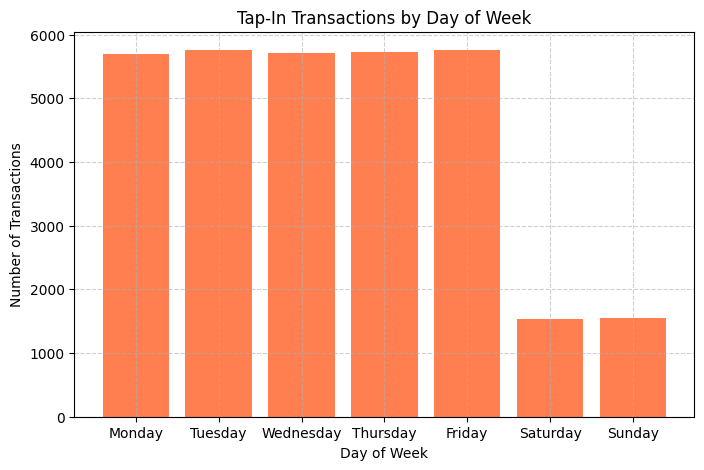

In [21]:
# Transactions by day of week
trans_by_day = df1.groupby('tapDay').size().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
]).reset_index(name='tap_count')

plt.figure(figsize=(8,5))
plt.bar(trans_by_day['tapDay'], trans_by_day['tap_count'], color='coral')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.title('Tap-In Transactions by Day of Week')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## (3) Recency, Frequency, Monetary (RFM)/Customer Life Value (CLV) Analysis

Recency, Frequency, Monetary (RFM) Analysis adalah metode yang digunakan untuk menganalisis perilaku pelanggan berdasarkan tiga faktor:

-    Recency (R): Seberapa baru seorang pelanggan melakukan pembelian? Biasanya diukur dengan jarak hari sejak pembelian terakhir.

-    Frequency (F): Seberapa sering seorang pelanggan melakukan pembelian dalam suatu periode? Biasanya dihitung jumlah transaksi.

-    Monetary (M): Berapa banyak uang yang dihabiskan oleh pelanggan? Biasanya dijumlahkan total pembelian.

Dengan RFM, kita dapat mengelompokkan pelanggan ke dalam segmen-segmen yang berbeda, seperti:

-    Pelanggan terbaik (nilai R, F, M tinggi)

-    Pelanggan yang hampir hilang (R rendah, F dan M tinggi)

-    Pelanggan baru (R tinggi, F dan M rendah)

-    Dan lain-lain.

Customer Lifetime Value (CLV) Analysis adalah metrik yang mengukur total nilai yang dihasilkan oleh seorang pelanggan selama hubungannya dengan bisnis. CLV membantu perusahaan dalam mengalokasikan sumber daya untuk mempertahankan pelanggan yang bernilai tinggi. Beberapa Pendekatan CLV:

-    Historical CLV: Total keuntungan yang dihasilkan pelanggan sejauh ini.

-    Predictive CLV: Memprediksi nilai masa depan pelanggan berdasarkan data historis.

In [22]:
# --- RFM / CLV per customer ---
# Asumsi: df1 memiliki 'tapOutTime' datetime dan 'payAmount' numeric.
# Jika 'tapOutTime' belum datetime, pastikan sebelumnya telah dikonversi.

# Referensi tanggal: gunakan tanggal terakhir dalam dataset (maksimum tapOutTime)
reference_date = df1['tapOutTime'].max()
print("Reference date (dataset max tapOutTime):", reference_date)

# Hitung Recency, Frequency, Monetary (CLV proxy)
rfm = (df1
       .groupby('payCardName')
       .agg(
           LastTransaction = ('tapOutTime','max'),
           Frequency = ('transID','count'),    # jika ada transID unik, gunakan itu; kalau tidak, ganti 'payCardName'
           Monetary = ('payAmount','sum')
       )
       .reset_index()
)

# Recency dalam hari
rfm['Recency'] = (reference_date - rfm['LastTransaction']).dt.days

# Tambahkan info demografis (age, bank, sex) dari 'customer' jika ada
if 'age' in customer.columns:
    rfm = rfm.merge(customer[['payCardName','age','payCardBank','payCardSex']], on='payCardName', how='left')
else:
    rfm = rfm.merge(customer[['payCardName','payCardBank','payCardSex']], on='payCardName', how='left')

# Urutkan untuk tinjauan
rfm = rfm.sort_values(by='Monetary', ascending=False).reset_index(drop=True)
rfm.head(10)

Reference date (dataset max tapOutTime): 2023-04-30 23:23:18


,payCardName,LastTransaction,Frequency,Monetary,Recency,age,payCardBank,payCardSex
0,Lanang Prastuti,2023-04-28 18:10:30,38,760000.0,2,38,brizzi,M
1,dr. Cayadi Yuliarti,2023-04-28 19:06:14,38,760000.0,2,37,dki,F
2,Jaswadi Suartini,2023-04-28 22:01:56,38,760000.0,2,11,dki,F
3,Tirta Siregar,2023-04-28 07:14:08,38,760000.0,2,30,dki,F
4,Yuliana Mayasari,2023-04-28 19:55:02,37,740000.0,2,29,dki,M
5,"Mustofa Wijayanti, M.Farm",2023-04-28 18:50:07,37,740000.0,2,42,dki,M
6,Fathonah Permadi,2023-04-28 23:38:17,37,740000.0,1,31,dki,M
7,R.A. Ghaliyati Susanti,2023-04-28 21:52:44,37,740000.0,2,26,brizzi,M
8,Jarwa Tampubolon,2023-04-28 21:40:28,37,740000.0,2,18,emoney,F
9,"Cagak Maheswara, S.Sos",2023-04-28 05:52:05,37,740000.0,2,31,dki,F


### Membuat RFM scoring

In [23]:
# --- Scoring RFM (contoh: 5-bucket) ---
# Pastikan tidak ada nilai identik untuk pemotongan; gunakan rank() agar stabil
rfm['R_score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=[5,4,3,2,1]).astype(int)   # recency: lebih kecil => lebih baik => label tinggi
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].sum(axis=1)
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# contoh: lihat top dan bottom segmen
display(rfm.sort_values('RFM_Score', ascending=False).head(10))
display(rfm.sort_values('RFM_Score', ascending=True).head(10))

,payCardName,LastTransaction,Frequency,Monetary,Recency,age,payCardBank,payCardSex,R_score,F_score,M_score,RFM_Score,RFM_Segment
77,Jamalia Permadi,2023-04-28 23:43:26,37,129500.0,1,42,dki,F,5,5,5,15,555
66,Latika Maheswara,2023-04-28 23:26:06,38,133000.0,1,27,emoney,M,5,5,5,15,555
115,Jaka Zulaika,2023-04-28 23:29:44,36,126000.0,1,27,flazz,F,5,5,5,15,555
6,Fathonah Permadi,2023-04-28 23:38:17,37,740000.0,1,31,dki,M,5,5,5,15,555
208,"Sutan Aswani Budiyanto, M.Kom.",2023-04-28 23:45:20,35,122500.0,1,57,online,F,5,5,5,15,555
210,Marwata Najmudin,2023-04-28 23:29:06,35,122500.0,1,14,emoney,F,5,5,5,15,555
47,Rahayu Prabowo,2023-04-29 13:33:06,40,140000.0,1,29,dki,F,5,5,5,15,555
0,Lanang Prastuti,2023-04-28 18:10:30,38,760000.0,2,38,brizzi,M,4,5,5,14,455
54,Laila Simanjuntak,2023-04-28 18:36:09,39,136500.0,2,31,flazz,F,4,5,5,14,455
51,Cut Malika Wastuti,2023-04-28 19:29:02,39,136500.0,2,56,dki,M,4,5,5,14,455


,payCardName,LastTransaction,Frequency,Monetary,Recency,age,payCardBank,payCardSex,R_score,F_score,M_score,RFM_Score,RFM_Segment
1415,H. Putu Rajata,2023-04-04 10:02:28,1,0.0,26,23,online,F,1,1,1,3,111
1431,Gawati Thamrin,2023-04-10 18:48:47,1,0.0,20,38,emoney,F,1,1,1,3,111
1446,Purwa Utama,2023-04-20 20:59:18,1,0.0,10,45,online,F,1,1,1,3,111
1511,Ir. Daru Gunawan,2023-04-01 21:15:55,1,0.0,29,36,brizzi,F,1,1,1,3,111
1522,Patricia Nababan,2023-04-10 10:32:41,1,0.0,20,23,dki,M,1,1,1,3,111
1523,Paulin Agustina,2023-04-10 21:00:21,1,0.0,20,40,emoney,F,1,1,1,3,111
1499,Sarah Hardiansyah,2023-04-18 12:51:39,1,0.0,12,57,flazz,F,1,1,1,3,111
1532,"Elvina Hidayat, S.IP",2023-04-13 18:13:27,1,0.0,17,13,dki,M,1,1,1,3,111
1564,Elvina Habibi,2023-04-15 13:59:05,1,0.0,15,35,bni,F,1,1,1,3,111
1568,"Dt. Aslijan Wibisono, S.Pt",2023-04-20 13:06:12,1,0.0,10,41,dki,M,1,1,1,3,111


### Memperbaiki durasi perjalanan menggunakan timedelta

In [24]:
# --- Trip duration (hours) akurat menggunakan timedelta ---
# Pastikan tapInTime dan tapOutTime sudah datetime
df1['tapInTime'] = pd.to_datetime(df1['tapInTime'], errors='coerce')
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'], errors='coerce')

# Hitung durasi (dalam jam, float)
df1['tripDuration_hours'] = (df1['tapOutTime'] - df1['tapInTime']).dt.total_seconds() / 3600.0

# Periksa nilai negatif (indikasi overnight atau inkonsistensi)
neg_count = (df1['tripDuration_hours'] < 0).sum()
print("Count negative durations:", neg_count)

# Jika ada negative durations, tampilkan contoh untuk inspeksi
if neg_count > 0:
    display(df1[df1['tripDuration_hours'] < 0].head(10))

# Statistik durasi
display(df1['tripDuration_hours'].describe().round(3))

Count negative durations: 0


,tripDuration_hours
count,31730.000
mean,1.203
std,0.468
min,0.250
25%,0.852
50%,1.201
75%,1.596
max,2.984


### Rangkuman rute, route counts, top routes

In [25]:
# --- Agregasi rute (tapInStopsName -> tapOutStopsName) ---
route_counts = (df1
                .groupby(['tapInStopsName','tapOutStopsName'])
                .size()
                .reset_index(name='TransactionCount')
                .sort_values('TransactionCount', ascending=False)
                .reset_index(drop=True))

route_counts.head(20)

,tapInStopsName,tapOutStopsName,TransactionCount
0,Rusun Kapuk Muara,Penjaringan,108
1,Penjaringan,Rusun Kapuk Muara,103
2,Garuda Taman Mini,BKN,92
3,Tanah Merdeka Arah Timur,Kampung Rambutan,79
4,Cibubur Junction,BKN,75
5,Simpang Danau Sunter Utara Barat,Jembatan Item,74
6,Garuda Taman Mini,Pinang Ranti,71
7,Rusun Penjaringan,Penjaringan,65
8,Penggilingan,Rusun Komarudin,62
9,Penjaringan,Rusun Penjaringan,61


### Hitung berapa banyak tap di tiap halte (tap in/out) dan tampilkan top 5

In [26]:
# Tap in counts
tapIn_counts = df1.groupby('tapInStopsName').size().reset_index(name='tapInCounts').sort_values('tapInCounts', ascending=False).reset_index(drop=True)
tapIn_counts.head(10)

# Tap out counts
tapOut_counts = df1.groupby('tapOutStopsName').size().reset_index(name='tapOutCounts').sort_values('tapOutCounts', ascending=False).reset_index(drop=True)
tapOut_counts.head(10)

,tapOutStopsName,tapOutCounts
0,BKN,274
1,Penjaringan,236
2,Term. Senen,175
3,Term. Kampung Rambutan,144
4,Monas,140
5,Ragunan,130
6,Pinang Ranti,129
7,Kejaksaan Agung,123
8,Jembatan Item,117
9,Cibubur Junction,114


### Kapan waktu terpadat untuk top 5 halte (tap-in dan tap-out)

In [27]:
# Pastikan kolom jam tersedia
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour

# Top 5 tap-in stops
top5_in = tapIn_counts.head(5)['tapInStopsName'].tolist()

# Busiest hour per stop (tap-in) untuk top5
busiest_in = (df1[df1['tapInStopsName'].isin(top5_in)]
              .groupby(['tapInStopsName','tapInHour'])
              .size()
              .reset_index(name='count')
              .sort_values(['tapInStopsName','count'], ascending=[True, False])
              .drop_duplicates(subset='tapInStopsName', keep='first')
              .sort_values('count', ascending=False)
             )
busiest_in

# Untuk tap-out: top5 tap-out stops
top5_out = tapOut_counts.head(5)['tapOutStopsName'].tolist()

busiest_out = (df1[df1['tapOutStopsName'].isin(top5_out)]
               .groupby(['tapOutStopsName','tapOutHour'])
               .size()
               .reset_index(name='count')
               .sort_values(['tapOutStopsName','count'], ascending=[True, False])
               .drop_duplicates(subset='tapOutStopsName', keep='first')
               .sort_values('count', ascending=False)
              )
busiest_out

,tapOutStopsName,tapOutHour,count
11,BKN,18,37
34,Penjaringan,7,31
76,Term. Senen,21,31
19,Monas,7,29
58,Term. Kampung Rambutan,20,23


### Visualisasi sederhana (bar chart top 5 tap-in/tap-out)

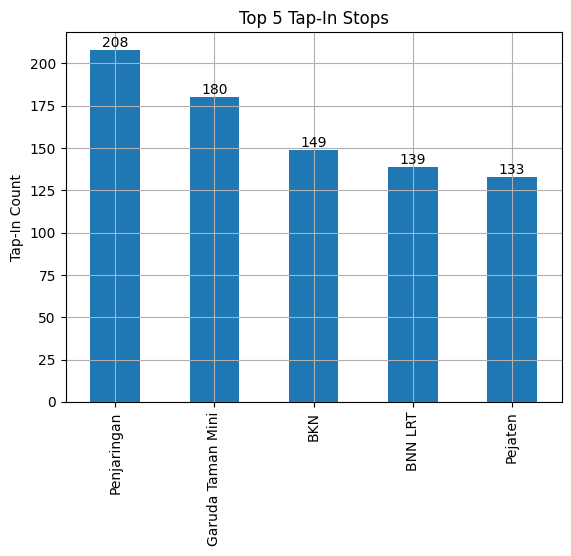

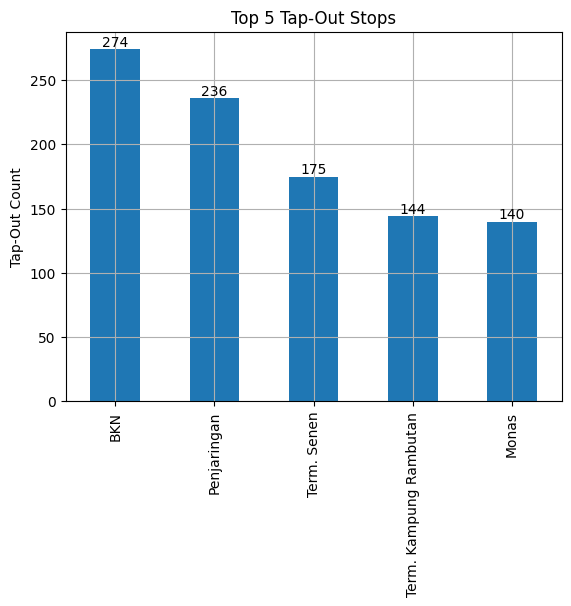

In [28]:
# Top5 tap-in bar
top5_in_df = tapIn_counts.head(5).copy()
ax = top5_in_df.plot(x='tapInStopsName', y='tapInCounts', kind='bar', legend=False)
for i, v in enumerate(top5_in_df['tapInCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title('Top 5 Tap-In Stops')
plt.xlabel('')
plt.ylabel('Tap-In Count')
plt.grid(True)
plt.show()

# Top5 tap-out bar
top5_out_df = tapOut_counts.head(5).copy()
ax = top5_out_df.plot(x='tapOutStopsName', y='tapOutCounts', kind='bar', legend=False)
for i, v in enumerate(top5_out_df.iloc[:,1]):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title('Top 5 Tap-Out Stops')
plt.xlabel('')
plt.ylabel('Tap-Out Count')
plt.grid(True)
plt.show()

### Gabungkan tap-in dan tap-out volume per halte

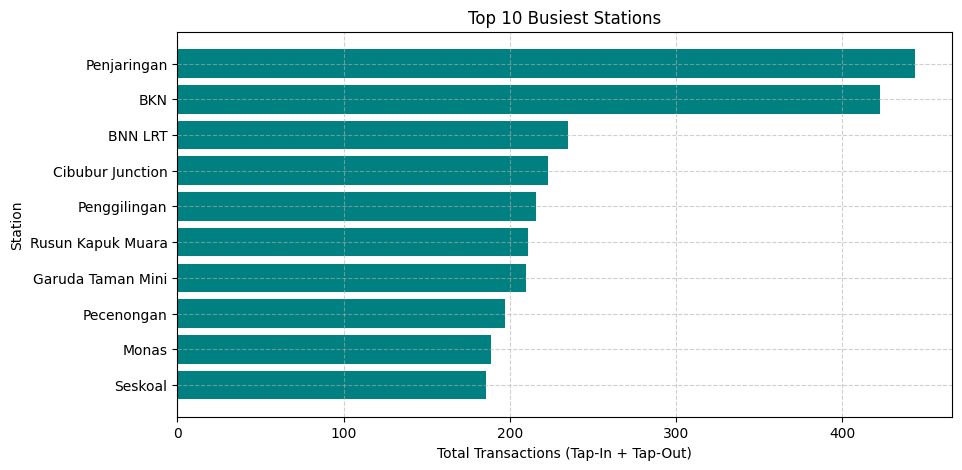

In [29]:
station_volume = (
    pd.concat([
        df1[['tapInStopsName']].rename(columns={'tapInStopsName':'station'}),
        df1[['tapOutStopsName']].rename(columns={'tapOutStopsName':'station'})
    ])
    .value_counts()
    .reset_index(name='total_transactions')
    .rename(columns={'index':'station'})
)

station_volume_top10 = station_volume.head(10)

plt.figure(figsize=(10,5))
plt.barh(station_volume_top10['station'], station_volume_top10['total_transactions'], color='teal')
plt.xlabel('Total Transactions (Tap-In + Tap-Out)')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Peta Folium untuk Top Routes/Top Stops (top N)

In [30]:
# --- Siapkan koordinat unik untuk setiap halte (gabungkan in/out coords jika tersedia) ---
coords_in = df1[['tapInStopsName','tapInStopsLat','tapInStopsLon']].drop_duplicates(subset='tapInStopsName').rename(columns={
    'tapInStopsName':'stopName','tapInStopsLat':'lat','tapInStopsLon':'lon'
})
coords_out = df1[['tapOutStopsName','tapOutStopsLat','tapOutStopsLon']].drop_duplicates(subset='tapOutStopsName').rename(columns={
    'tapOutStopsName':'stopName','tapOutStopsLat':'lat','tapOutStopsLon':'lon'
})

coords = pd.concat([coords_in, coords_out], ignore_index=True)
coords = coords.drop_duplicates(subset='stopName').reset_index(drop=True)

# Pilih top N routes (mis. top10 highest transaction count) dan ambil koordinat tapIn
top_routes = route_counts.head(10).copy()
top_routes = top_routes.merge(coords, left_on='tapInStopsName', right_on='stopName', how='left').rename(columns={'lat':'in_lat','lon':'in_lon'})
top_routes = top_routes.merge(coords, left_on='tapOutStopsName', right_on='stopName', how='left').rename(columns={'lat':'out_lat','lon':'out_lon'})

# Buat peta terpusat di Jakarta
m = folium.Map(location=[-6.1751,106.8272], zoom_start=11)

# Tambah marker dan polyline untuk tiap route (jika koordinat tersedia)
for _, r in top_routes.iterrows():
    if pd.notna(r['in_lat']) and pd.notna(r['in_lon']):
        folium.Marker([r['in_lat'], r['in_lon']],
                      popup=f"In: {r['tapInStopsName']}\nCount: {r['TransactionCount']}",
                      icon=folium.Icon(color='green')).add_to(m)
    if pd.notna(r['out_lat']) and pd.notna(r['out_lon']):
        folium.Marker([r['out_lat'], r['out_lon']],
                      popup=f"Out: {r['tapOutStopsName']}\nCount: {r['TransactionCount']}",
                      icon=folium.Icon(color='red')).add_to(m)
    # gambar garis rute jika kedua koordinat ada
    if pd.notna(r.get('in_lat')) and pd.notna(r.get('out_lat')):
        folium.PolyLine(locations=[[r['in_lat'], r['in_lon']],[r['out_lat'], r['out_lon']]],
                        weight=2, tooltip=f"{r['tapInStopsName']} → {r['tapOutStopsName']} ({r['TransactionCount']})"
                       ).add_to(m)

# Tampilkan peta (di notebook akan render)
m

### Deteksi outliers durasi (mis. > 6 jam) untuk memeriksa data rusak

In [31]:
# gunakan df1_corrected jika koreksi tadi dijalankan; jika tidak, gunakan df1
df_check = df1_corrected if 'df1_corrected' in globals() else df1

# pastikan kolom ada
if 'tripDuration_hours' not in df_check.columns:
    df_check['tripDuration_hours'] = (df_check['tapOutTime'] - df_check['tapInTime']).dt.total_seconds() / 3600.0

# threshold outlier (adjustable)
threshold_hours = 6.0
outliers = df_check[df_check['tripDuration_hours'] > threshold_hours].copy()
print("Jumlah trip dengan durasi >", threshold_hours, "jam:", len(outliers))
print("Persentase dari total:", round(100*len(outliers)/len(df_check),4), "%")
display(outliers[['payCardName','tapInStopsName','tapOutStopsName','tapInTime','tapOutTime','tripDuration_hours']].head(20))

Jumlah trip dengan durasi > 6.0 jam: 0
Persentase dari total: 0.0 %


,payCardName,tapInStopsName,tapOutStopsName,tapInTime,tapOutTime,tripDuration_hours


### Heatmap jam × halte (matrix) untuk melihat pola puncak harian

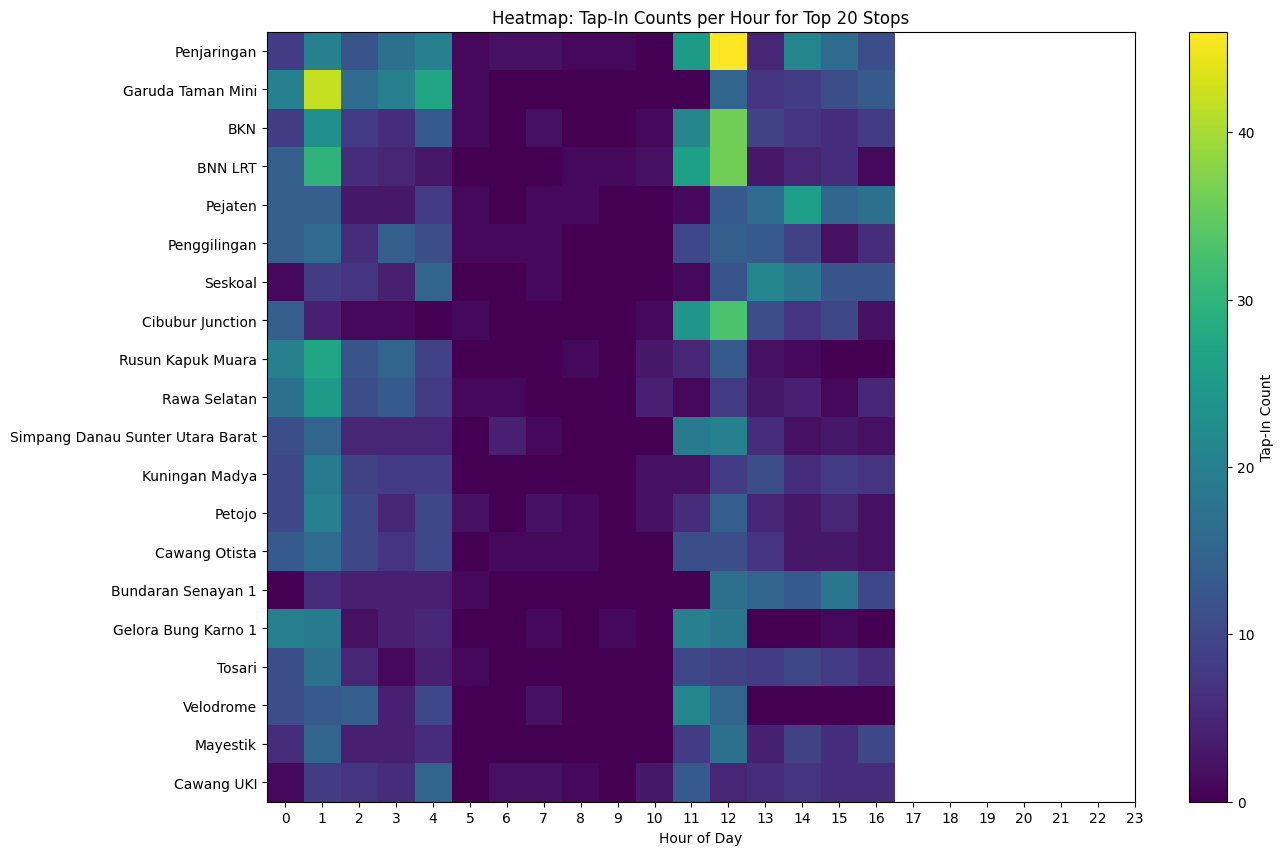

In [32]:
df_heat = df_check.copy()
df_heat['tapInHour'] = df_heat['tapInTime'].dt.hour

# pilih top N stops berdasarkan total tap-in
top_n = 20
top_stops = df_heat['tapInStopsName'].value_counts().head(top_n).index.tolist()

# pivot table: index = stop, columns = hour, values = counts
pivot = (df_heat[df_heat['tapInStopsName'].isin(top_stops)]
         .groupby(['tapInStopsName','tapInHour'])
         .size()
         .reset_index(name='count')
        )

pivot_table = pivot.pivot(index='tapInStopsName', columns='tapInHour', values='count').fillna(0)

# sort stops by total volume for nicer plotting
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('total', ascending=False).drop(columns='total')

# plot heatmap
plt.figure(figsize=(14,10))
plt.imshow(pivot_table, aspect='auto', interpolation='nearest')
plt.colorbar(label='Tap-In Count')
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xticks(range(0,24), range(0,24))
plt.xlabel('Hour of Day')
plt.title(f'Heatmap: Tap-In Counts per Hour for Top {top_n} Stops')
plt.show()

### Segmentasi RFM lebih lanjut (k-means clustering) pada fitur RFM (setelah scaling)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# gunakan rfm yang sudah ada; pastikan kolom Recency, Frequency, Monetary ada
rfm_model = rfm[['payCardName','Recency','Frequency','Monetary']].copy()

# log-transform Monetary & Frequency to reduce skew (add small const to avoid log(0))
rfm_model['log_M'] = np.log1p(rfm_model['Monetary'])
rfm_model['log_F'] = np.log1p(rfm_model['Frequency'])
rfm_model['R'] = rfm_model['Recency']  # keep as-is or transform if skewed

X = rfm_model[['R','log_F','log_M']].values

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method + silhouette for k in range
sse = []
sil_scores = []
K_range = range(2,9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# show results
print("K\tSSE\tSilhouette")
for k,s,e in zip(K_range,sse,sil_scores):
    print(k, round(s,2), round(e,3))

# choose k (example: pick k with good silhouette and elbow), here use k=4 as example
k_best = 4
km = KMeans(n_clusters=k_best, random_state=42, n_init=20)
labels = km.fit_predict(X_scaled)

rfm_model['cluster'] = labels
rfm_model['cluster'].value_counts()

# Centroids in original scaled space -> transform back for interpretation
centroids_scaled = km.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids_scaled)
centroids = pd.DataFrame(centroids_unscaled, columns=['R','log_F','log_M'])
centroids['Frequency'] = np.expm1(centroids['log_F']).round(2)
centroids['Monetary'] = np.expm1(centroids['log_M']).round(2)
centroids[['R','Frequency','Monetary']]

# Cluster dengan low Recency, high Frequency, high Monetary = best customers.
# Cluster dengan high Recency, low Frequency, low Monetary = churned/low-value.
# Gunakan centroid values untuk memberi label (Champions, At-risk, Loyal, etc.).

K	SSE	Silhouette
2 3852.54 0.451
3 2324.28 0.516
4 1289.7 0.635
5 935.27 0.678
6 609.99 0.731
7 458.21 0.755
8 336.44 0.783


,R,Frequency,Monetary
0,18.909574,1.04,70.99
1,3.729075,25.66,0.00
2,1.801083,2.98,3166.33
3,3.753731,28.10,110801.24


In [34]:
# install lifetimes if belum ada (jalankan sekali di Colab)
!pip install lifetimes

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data

# 1) persiapkan data transaksi: pastikan df1 punya kolom customer id dan transaction datetime & monetary
transactions = df1[['payCardName','tapOutTime','payAmount']].copy().rename(columns={
    'payCardName':'customer_id','tapOutTime':'date','payAmount':'monetary_value'
})
transactions = transactions.dropna(subset=['date'])  # ensure dates exist

# 2) summary table needed by lifetimes: uses weekly/days as frequency unit (use days)
summary = summary_data_from_transaction_data(transactions, 'customer_id', 'date', monetary_value_col='monetary_value', observation_period_end=transactions['date'].max())

# summary has: frequency, recency (in days), T (in days), monetary_avg
summary.head()

# 3) Fit BG/NBD model (for repeat transaction prediction)
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(bgf.summary)

# 4) Fit Gamma-Gamma for monetary
ggf = GammaGammaFitter(penalizer_coef=0.0)
# lifetimes requires customers with frequency > 0 and monetary_avg > 0
summary_gg = summary[summary['monetary_value'] > 0].copy() # Use monetary_value
ggf.fit(summary_gg['frequency'], summary_gg['monetary_value']) # Use monetary_value
print(ggf.summary)

# 5) Predict CLTV (expected monetary value * expected repeat transactions) for horizon (e.g., 30 days)
expected_purchases_30 = bgf.conditional_expected_number_of_purchases_up_to_time(30, summary['frequency'], summary['recency'], summary['T'])
expected_avg_value = ggf.conditional_expected_average_profit(summary['frequency'], summary['monetary_value']) # Use monetary_value
clv_30 = expected_purchases_30 * expected_avg_value
summary['clv_30_days'] = clv_30
display(summary[['frequency','recency','T','monetary_value','clv_30_days']].sort_values('clv_30_days', ascending=False).head(10)) # Use monetary_value

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.3 MB/s eta 0:00:00
            coef   se(coef)  lower 95% bound  upper 95% bound
r       1.227159   0.049940         1.129277         1.325042
alpha   3.006357   0.141483         2.729050         3.283664
a       0.359087   0.171788         0.022383         0.695791
b      26.253142  14.638389        -2.438100        54.944384
           coef     se(coef)  lower 95% bound  upper 95% bound
p      0.679511     0.044747         0.591807         0.767215
q      5.025372     0.405853         4.229899         5.820845
v  38717.422253  5559.895681     27820.026717     49614.817788


,frequency,recency,T,monetary_value,clv_30_days
customer_id,,,,,
dr. Cayadi Yuliarti,19.0,25.0,27.0,37894.736842,554715.264605
Lanang Prastuti,19.0,25.0,27.0,37894.736842,554715.264605
Tirta Siregar,19.0,25.0,27.0,37894.736842,554715.264605
"Mustofa Wijayanti, M.Farm",18.0,25.0,27.0,40000.000000,551016.830521
Jaswadi Suartini,18.0,25.0,27.0,40000.000000,551016.830521
"Nurul Handayani, S.Ked",19.0,25.0,27.0,36842.105263,540092.817609
Jasmani Tamba,19.0,25.0,27.0,36842.105263,540092.817609
Yuliana Mayasari,19.0,25.0,27.0,36842.105263,540092.817609
"Cut Gabriella Haryanti, S.Sos",19.0,25.0,27.0,36842.105263,540092.817609


## (4) Pipeline Modeling

Pipeline adalah cara untuk mengotomatiskan dan mengorganisir alur kerja (workflow) machine learning secara berurutan. Bayangkan seperti jalur perakitan di pabrik dimana data melewati berbagai tahap proses secara sistematis hingga akhirnya menghasilkan model.

Pipeline biasanya terdiri dari beberapa tahap:

1. Preprocessing & Feature Engineering

- Scaling/Normalization
- Handling missing values
- Encoding categorical variables
- Feature selection
- Dimensionality reduction (PCA)

2. Model Training

- Memilih algoritma (Random Forest, SVM, dll)
- Training model
- Hyperparameter tuning

3. Evaluation & Deployment
- Validasi model
- Testing
- Deployment ke production

In [35]:
# --- 1. Safety checks & prepare CLV/RFM table ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1) Ensure datetime for safety (no import/cleaning repeated if already done)
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'], errors='coerce')

# 2) reference date = last observed tapOutTime
reference_date = df1['tapOutTime'].max()
print("Reference date:", reference_date)

# 3) Frequency: prefer unique transID if exists, otherwise count rows
if 'transID' in df1.columns:
    freq = df1.groupby('payCardName')['transID'].nunique().reset_index(name='Frequency')
else:
    freq = df1.groupby('payCardName').size().reset_index(name='Frequency')

# 4) Monetary (Value): sum of payAmount (safe coercion to numeric)
df1['payAmount'] = pd.to_numeric(df1['payAmount'], errors='coerce').fillna(0)
monetary = df1.groupby('payCardName')['payAmount'].sum().reset_index(name='Value')

# 5) Last transaction date -> Recency (days since last transaction)
last_tx = df1.groupby('payCardName')['tapOutTime'].max().reset_index(name='LastTransaction')
last_tx['Recency'] = (reference_date - last_tx['LastTransaction']).dt.days

# 6) Merge into one CLV/RFM table
clv_simple = freq.merge(last_tx[['payCardName','Recency']], on='payCardName').merge(monetary, on='payCardName')

# 7) Final columns & quick check
clv_simple = clv_simple[['payCardName','Recency','Frequency','Value']].reset_index(drop=True)
clv_simple.head()

# 8) (Optional) scale for clustering (MinMaxScaler)
scaler = MinMaxScaler()
cols_to_scale = ['Recency','Frequency','Value']
clv_scaled = clv_simple.copy()
clv_scaled[cols_to_scale] = scaler.fit_transform(clv_scaled[cols_to_scale])

# show scaled sample
clv_scaled.head()

Reference date: 2023-04-30 23:23:18


,payCardName,Recency,Frequency,Value
0,Abyasa Haryanti,0.068966,0.457143,0.000000
1,Ade Astuti,0.068966,0.514286,0.000000
2,Ade Halimah,0.000000,0.228571,0.095395
3,Ade Suryono,0.000000,0.042857,0.013816
4,Ade Waluyo,0.275862,0.028571,0.009211


### Tentukan range cluster dan evaluasi dengan Elbow & Silhouette

Elbow Method adalah teknik yang digunakan untuk membantu menentukan jumlah kluster (K) yang optimal dalam algoritma K-Means. Metode ini didasarkan pada prinsip bahwa kita ingin memilih K yang meminimalkan variansi dalam kluster (dihitung dengan Within-Cluster Sum of Squares atau WCSS) tetapi tanpa menambahkan terlalu banyak kompleksitas (yaitu, tidak memilih K yang terlalu besar).

Disebut "elbow" karena plotnya sering menyerupai lengan, di mana terdapat penurunan WCSS yang cepat pada awalnya (seperti dari K=1 ke K=2, dan seterusnya) dan kemudian penurunan menjadi lebih landai setelah suatu titik. Titik di mana perubahan dari cepat ke landai itulah yang disebut "siku".

Silhouette Analysis adalah metode lain untuk mengevaluasi kualitas kluster dan menentukan K yang optimal. Metode ini mengukur seberapa baik setiap titik data dalam satu kluster cocok dengan klusternya sendiri dibandingkan dengan kluster terdekat lainnya.

Silhouette Analysis dapat memberikan ukuran yang lebih interpretatif tentang kualitas kluster. Ia juga dapat membantu membandingkan berbagai ukuran K dan juga berbagai algoritma kluster.

Kedua metode ini saling melengkapi. Dalam praktiknya, sering kali kita menggunakan kedua metode tersebut dan mempertimbangkan hasil keduanya untuk memilih K yang optimal. Selain itu, pertimbangan domain knowledge juga sangat penting.

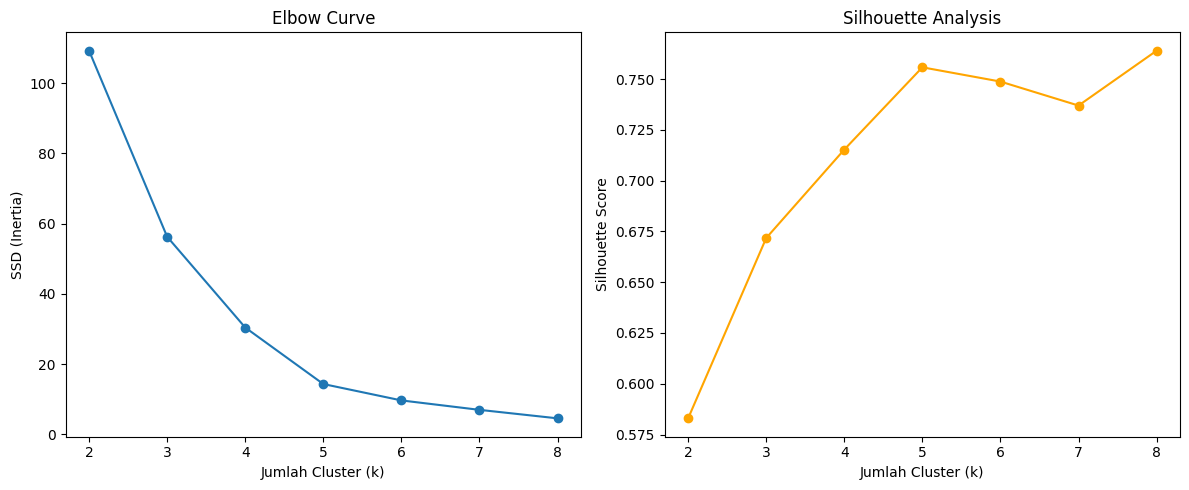

k=2 → Silhouette Score: 0.583
k=3 → Silhouette Score: 0.672
k=4 → Silhouette Score: 0.715
k=5 → Silhouette Score: 0.756
k=6 → Silhouette Score: 0.749
k=7 → Silhouette Score: 0.737
k=8 → Silhouette Score: 0.764


In [36]:
# --- Evaluasi jumlah cluster (Elbow & Silhouette) ---

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = clv_scaled[['Recency', 'Frequency', 'Value']]

ssd = []                # Sum of Squared Distances
silhouette_scores = []  # Silhouette Coefficient

range_n_clusters = range(2, 9)

for k in range_n_clusters:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    km.fit(X)
    ssd.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, km.labels_))

# Plot hasil evaluasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSD (Inertia)')
plt.title('Elbow Curve')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

for k, s in zip(range_n_clusters, silhouette_scores):
    print(f"k={k} → Silhouette Score: {s:.3f}")

### Fit model K-Means dengan k terbaik

K-Means adalah sebuah algoritma unsupervised learning (pembelajaran tanpa pengawasan) yang digunakan untuk pengelompokan data (clustering). Tujuannya adalah untuk mengelompokkan data menjadi K buah kluster (kelompok), di mana setiap data dalam satu kluster memiliki karakteristik yang serupa, dan data dari kluster yang berbeda memiliki karakteristik yang berbeda.

Huruf "K" mewakili jumlah kluster yang ingin dibentuk, dan harus ditentukan oleh kita sebelum algoritma dijalankan.

In [37]:
# --- Fit KMeans final ---
k_best = 4  # ubah sesuai hasil Elbow & Silhouette
km_final = KMeans(n_clusters=k_best, random_state=42, n_init=30)
clv_scaled['Cluster'] = km_final.fit_predict(X)

# Simpan label ke versi asli
clv_simple['Cluster'] = clv_scaled['Cluster']

# Lihat distribusi cluster
print("Distribusi jumlah pelanggan per cluster:\n")
print(clv_simple['Cluster'].value_counts().sort_index())

Distribusi jumlah pelanggan per cluster:

Cluster
0    686
1    739
2    454
3     38
Name: count, dtype: int64


### Visualisasi hasil (2D PCA & 3D scatter)

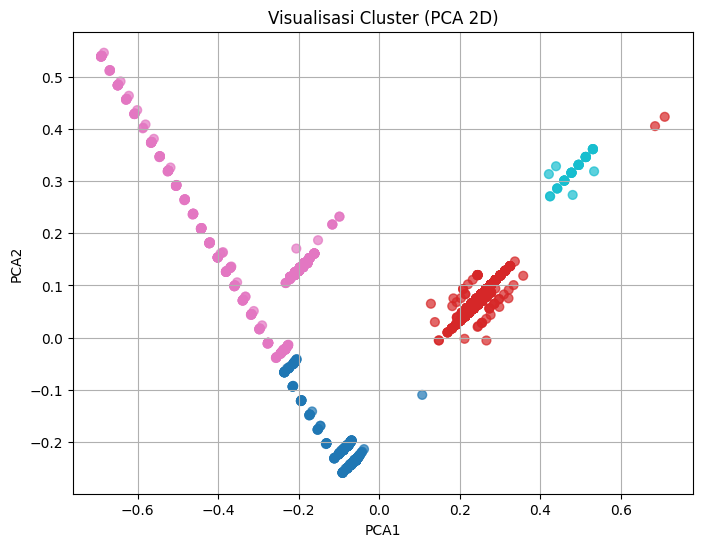

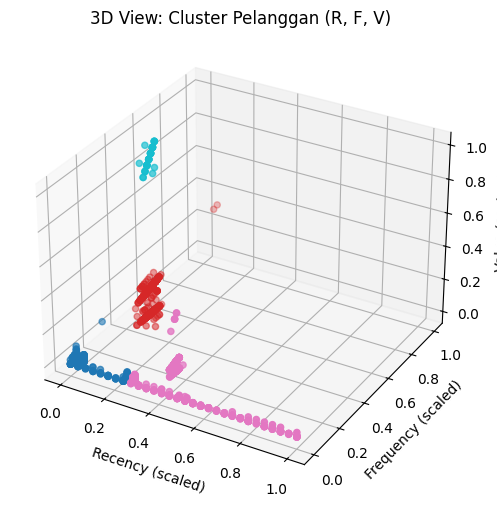

In [38]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- PCA 2D projection untuk visualisasi ---
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(pca_coords[:,0], pca_coords[:,1],
            c=clv_scaled['Cluster'], cmap='tab10', s=40, alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualisasi Cluster (PCA 2D)')
plt.grid(True)
plt.show()

# --- 3D scatter (opsional) ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clv_scaled['Recency'], clv_scaled['Frequency'], clv_scaled['Value'],
           c=clv_scaled['Cluster'], cmap='tab10', s=20)
ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Value (scaled)')
ax.set_title('3D View: Cluster Pelanggan (R, F, V)')
plt.show()

### Profiling & interpretasi cluster

In [39]:
# --- Profiling centroid & statistik per cluster ---
centroids_scaled = km_final.cluster_centers_
centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(centroids_scaled),
    columns=['Recency','Frequency','Value']
)
centroids_unscaled['Cluster'] = range(k_best)
centroids_unscaled = centroids_unscaled[['Cluster','Recency','Frequency','Value']]

print("Centroid tiap cluster (dalam skala asli):")
display(centroids_unscaled.round(2))

# Statistik ringkas per cluster
profile = (clv_simple.groupby('Cluster')
            .agg(Count=('payCardName','count'),
                 Recency_mean=('Recency','mean'),
                 Frequency_mean=('Frequency','mean'),
                 Value_mean=('Value','mean'))
            .sort_index())
display(profile.round(2))

Centroid tiap cluster (dalam skala asli):


,Cluster,Recency,Frequency,Value
0,0,1.11,3.26,8381.92
1,1,1.99,34.48,63691.47
2,2,13.83,5.89,14759.91
3,3,2.00,35.32,706315.79


,Count,Recency_mean,Frequency_mean,Value_mean
Cluster,,,,
0,686,1.11,3.26,8381.92
1,739,1.99,34.48,63691.47
2,454,13.83,5.89,14759.91
3,38,2.00,35.32,706315.79


### Boxplot distribusi per fitur

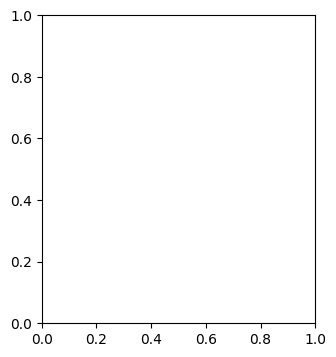

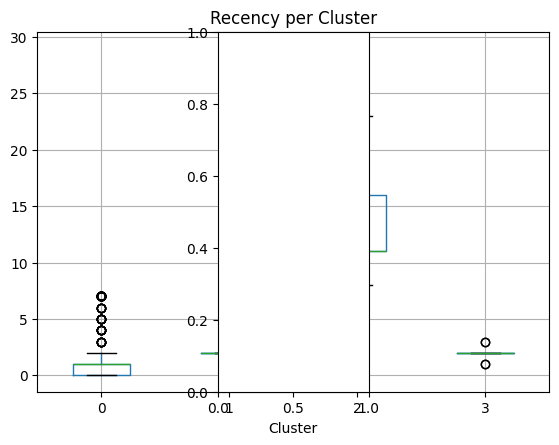

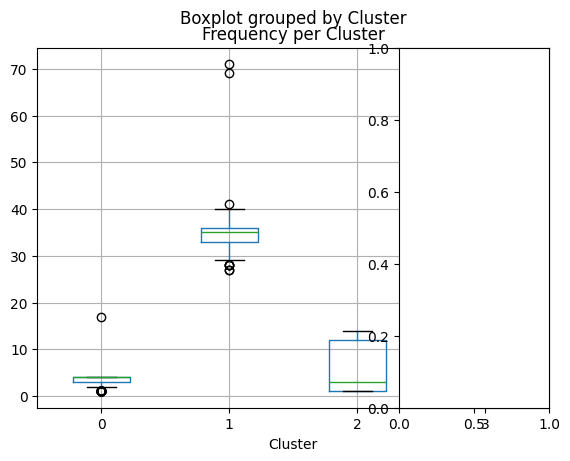

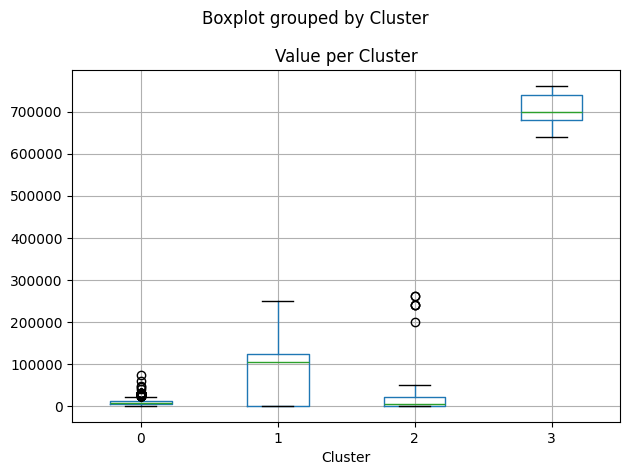

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
clv_simple.boxplot(column='Recency', by='Cluster')
plt.title('Recency per Cluster'); plt.suptitle('')

plt.subplot(1,3,2)
clv_simple.boxplot(column='Frequency', by='Cluster')
plt.title('Frequency per Cluster')

plt.subplot(1,3,3)
clv_simple.boxplot(column='Value', by='Cluster')
plt.title('Value per Cluster')

plt.tight_layout()
plt.show()

### Analisis naratif otomatis per cluster

In [41]:
# Normalisasi agar dapat dibandingkan relatif antar-cluster
desc_stats = centroids_unscaled.copy()
desc_stats_norm = desc_stats[['Recency','Frequency','Value']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
desc_stats_norm['Cluster'] = desc_stats['Cluster']

cluster_narratives = []

for _, row in desc_stats_norm.iterrows():
    cluster_id = int(row['Cluster'])
    rec, freq, val = row['Recency'], row['Frequency'], row['Value']

    # --- aturan deskriptif sederhana ---
    if rec < 0.3 and freq > 0.7 and val > 0.7:
        label = "Pelanggan sangat aktif dan bernilai tinggi (Champions)"
        mood = "🟢"
    elif rec < 0.5 and freq > 0.5:
        label = "Pelanggan aktif dengan nilai sedang (Regular Loyal)"
        mood = "🟡"
    elif rec > 0.7 and freq < 0.4:
        label = "Pelanggan dorman atau berisiko hilang (At Risk)"
        mood = "🔴"
    else:
        label = "Pelanggan sporadis / nilai rendah (Casual)"
        mood = "⚪"

    narrative = (f"Cluster {cluster_id}: {mood} "
                 f"Recency={rec:.2f}, Frequency={freq:.2f}, Value={val:.2f} → {label}.")
    cluster_narratives.append(narrative)

print("\n=== Narasi Otomatis per Cluster ===\n")
for n in cluster_narratives:
    print(n)


=== Narasi Otomatis per Cluster ===

Cluster 0: ⚪ Recency=0.00, Frequency=0.00, Value=0.00 → Pelanggan sporadis / nilai rendah (Casual).
Cluster 1: 🟡 Recency=0.07, Frequency=0.97, Value=0.08 → Pelanggan aktif dengan nilai sedang (Regular Loyal).
Cluster 2: 🔴 Recency=1.00, Frequency=0.08, Value=0.01 → Pelanggan dorman atau berisiko hilang (At Risk).
Cluster 3: 🟢 Recency=0.07, Frequency=1.00, Value=1.00 → Pelanggan sangat aktif dan bernilai tinggi (Champions).


## (5) Forecasting Transaksi/Retensi (Probabilistik Model)

Pendekatan ini cocok untuk data seperti TransJakarta karena bersifat event-based (tiap tap = transaksi). Model paling umum: BG/NBD + Gamma-Gamma. Tujuannya memprediksi berapa kali pelanggan akan bertransaksi lagi (frequency prediction), dan memperkirakan nilai moneter masa depan (Customer Lifetime Value).

In [42]:
# install lifetimes if belum ada (jalankan sekali)
!pip install lifetimes --quiet

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_frequency_recency_matrix, plot_period_transactions
import pandas as pd

# --- Defensive: pastikan df1 ada dan kolom yang diperlukan tersedia ---
# Required columns: 'payCardName' (customer id), 'tapOutTime' (datetime), 'payAmount' (monetary)
# If tapOutTime missing for some rows, consider using tapInTime instead (but be consistent).

# 1) Prepare transactions dataframe
transactions = df1[['payCardName','tapOutTime','payAmount']].copy().rename(columns={
    'payCardName':'customer_id','tapOutTime':'date','payAmount':'monetary_value'
})
transactions = transactions.dropna(subset=['customer_id','date'])  # require id + date
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')
transactions = transactions.dropna(subset=['date'])  # drop rows with invalid dates

# Ensure monetary numeric and non-negative
transactions['monetary_value'] = pd.to_numeric(transactions['monetary_value'], errors='coerce').fillna(0)
transactions.loc[transactions['monetary_value'] < 0, 'monetary_value'] = 0

# 2) Build summary table required by lifetimes
# observation_period_end optional: use max date in transactions
observation_end = transactions['date'].max()
print("Observation period end:", observation_end)

summary = summary_data_from_transaction_data(
    transactions,
    customer_id_col='customer_id',
    datetime_col='date',
    monetary_value_col='monetary_value',
    observation_period_end=observation_end
)
# summary columns: frequency, recency, T, monetary_avg
# summary = summary.reset_index().rename(columns={'index':'CustomerID'}).set_index('CustomerID') # This renaming caused previous error, remove

# Quick checks
print("Summary shape:", summary.shape)
display(summary.head())

# 3) Filter customers usable for modeling
# BG/NBD requires frequency >= 0 (frequency = number of repeat purchases)
# Gamma-Gamma requires monetary_avg > 0
summary_for_bgnbd = summary.copy()   # BG/NBD can work with freq >=0 (but freq=0 means no repeat purchases)
summary_for_gg = summary[summary['monetary_value'] > 0].copy() # Use monetary_value here

# 4) Fit BG/NBD (Beta-Geometric / Negative Binomial)
bgf = BetaGeoFitter(penalizer_coef=0.001)
# Note: arguments are (frequency, recency, T)
bgf.fit(summary_for_bgnbd['frequency'], summary_for_bgnbd['recency'], summary_for_bgnbd['T'])
print("BG/NBD fitted. params:", bgf.params_)

# Optional: visualize frequency-recency matrix (diagnostic)
# plot_frequency_recency_matrix(bgf) # Move plotting to a separate cell
# plot_period_transactions(bgf) # Move plotting to a separate cell

# 5) Fit Gamma-Gamma model (monetary), requires customers with monetary_avg > 0 and frequency > 0
ggf = GammaGammaFitter(penalizer_coef=0.001)
# lifetimes requires customers with frequency > 0 and monetary_avg > 0
# Use monetary_value for the monetary data in Gamma-Gamma fitting
ggf.fit(summary_for_gg['frequency'], summary_for_gg['monetary_value'])
print("Gamma-Gamma fitted. params:", ggf.params_)

# 6) Make predictions
# Predict expected purchases in next 30 days
summary['predicted_purchases_30d'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30,
    summary['frequency'],
    summary['recency'],
    summary['T']
)

# Predict expected average transaction value (for customers with monetary_avg > 0)
# For those with monetary_value == 0, we can leave NaN or impute.
summary.loc[summary['monetary_value'] > 0, 'expected_avg_value'] = ggf.conditional_expected_average_profit(
    summary.loc[summary['monetary_value'] > 0, 'frequency'],
    summary.loc[summary['monetary_value'] > 0, 'monetary_value']
)

# 7) Predict CLV: use lifetimes' customer_lifetime_value (returns expected total monetary value)
# Here we compute 3-month CLV (time=3 months), freq='D' because our recency/T are in days
# Need to ensure frequency and monetary_value are passed correctly
summary['predicted_clv_3m'] = ggf.customer_lifetime_value(
    bgf,
    summary['frequency'],
    summary['recency'],
    summary['T'], # Pass T as well
    summary['monetary_value'].fillna(0), # Pass monetary value, handle NaNs
    time=3*30,       # time in days (3 months * 30 days/month)
    freq='D',     # frequency of the data: 'D' for days
    discount_rate=0.01
)


# 8) Inspect top customers by predicted CLV
top_clv = summary.sort_values('predicted_clv_3m', ascending=False).head(10)
display(top_clv[['frequency','recency','T','monetary_value','predicted_purchases_30d','predicted_clv_3m']])

# 9) Merge predictions back to original CLV table (optional)
# Assuming clv_simple has 'payCardName' as a regular column
clv_simple_reset = clv_simple.reset_index() # Reset index to merge on 'payCardName'
summary_reset = summary.reset_index().rename(columns={'customer_id': 'payCardName'}) # Reset index and rename for merge

clv_with_preds = clv_simple_reset.merge(
    summary_reset[['payCardName', 'predicted_purchases_30d', 'predicted_clv_3m']],
    on='payCardName',
    how='left'
)
display(clv_with_preds[['payCardName','Recency','Frequency','Value','predicted_purchases_30d','predicted_clv_3m']].head(10))

Observation period end: 2023-04-30 23:23:18
Summary shape: (1917, 4)


,frequency,recency,T,monetary_value
customer_id,,,,
Abyasa Haryanti,17.0,25.0,27.0,0.000000
Ade Astuti,19.0,25.0,27.0,0.000000
Ade Halimah,9.0,22.0,22.0,7666.666667
Ade Suryono,3.0,21.0,21.0,3500.000000
Ade Waluyo,2.0,14.0,22.0,3500.000000


BG/NBD fitted. params: r        1.224927
alpha    3.020155
a        0.070206
b        2.822986
dtype: float64
Gamma-Gamma fitted. params: p    11.476334
q     0.304803
v    11.414971
dtype: float64


,frequency,recency,T,monetary_value,predicted_purchases_30d,predicted_clv_3m
customer_id,,,,,,
Jaswadi Suartini,18.0,25.0,27.0,40000.000000,18.466888,3.574791e+07
"Mustofa Wijayanti, M.Farm",18.0,25.0,27.0,40000.000000,18.466888,3.574791e+07
Lanang Prastuti,19.0,25.0,27.0,37894.736842,19.421742,3.560869e+07
Tirta Siregar,19.0,25.0,27.0,37894.736842,19.421742,3.560869e+07
dr. Cayadi Yuliarti,19.0,25.0,27.0,37894.736842,19.421742,3.560869e+07
Fathonah Permadi,19.0,25.0,27.0,36842.105263,19.421742,3.461958e+07
Tgk. Cagak Zulaika,19.0,25.0,27.0,36842.105263,19.421742,3.461958e+07
Yuliana Mayasari,19.0,25.0,27.0,36842.105263,19.421742,3.461958e+07
"Cagak Maheswara, S.Sos",19.0,25.0,27.0,36842.105263,19.421742,3.461958e+07


,payCardName,Recency,Frequency,Value,predicted_purchases_30d,predicted_clv_3m
0,Abyasa Haryanti,2,33,0.0,17.510863,5.691723e+02
1,Ade Astuti,2,37,0.0,19.421742,5.645358e+02
2,Ade Halimah,0,17,72500.0,11.823948,4.373092e+06
3,Ade Suryono,0,4,10500.0,5.051441,8.666767e+05
4,Ade Waluyo,8,3,7000.0,3.536379,6.153815e+05
5,Adhiarja Lazuardi,0,3,20000.0,3.693531,1.834423e+06
6,Adhiarja Wahyudin,2,33,115500.0,18.466888,5.387492e+06
7,Adhiarja Winarsih,1,4,7000.0,5.037217,2.887045e+05
8,Adiarja Waluyo,2,36,126000.0,19.421742,6.058892e+06
9,"Adika Kusumo, S.H.",11,12,0.0,2.717068,2.481123e+02


Max T (observation period in days): 29.0


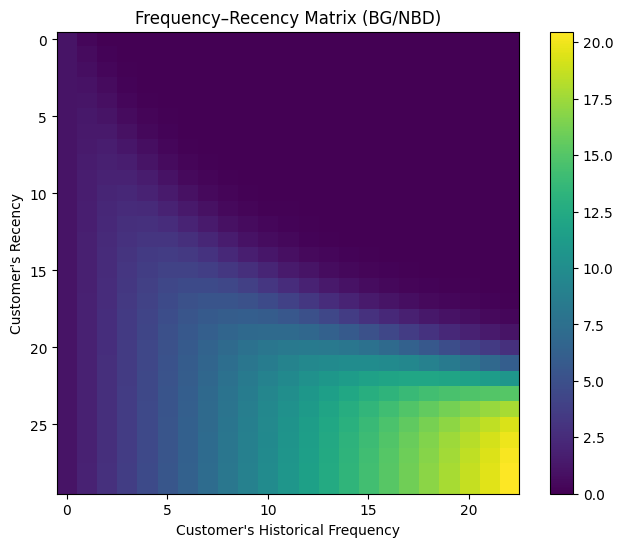

<Figure size 800x600 with 0 Axes>

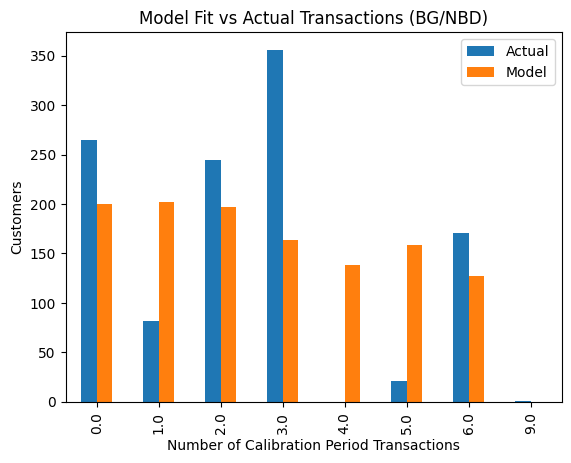

In [43]:
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix, plot_period_transactions

# Pastikan summary ada dan memiliki kolom 'T'
print("Max T (observation period in days):", summary['T'].max())

# 1) Frequency-Recency matrix — T harus skalar (mis. maksimum T dari summary)
T_scalar = summary['T'].max()

plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(bgf, T_scalar)   # bgf + scalar T
plt.title('Frequency–Recency Matrix (BG/NBD)')
plt.show()

# 2) Period transactions plot — visualisasi model fit vs actual
# plot_period_transactions can be called with the model alone
plt.figure(figsize=(8,6))
plot_period_transactions(bgf)
plt.title('Model Fit vs Actual Transactions (BG/NBD)')
plt.show()

### Forecasting Volume Lalu Lintas (Time Series) dengan ARIMA/SARIMA

Length of train data: 1
Length of test data: 4


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


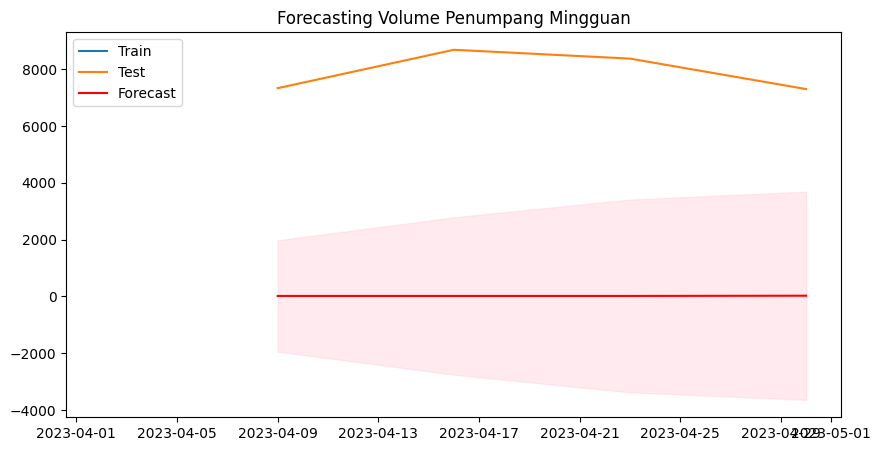

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Agregasi transaksi mingguan
ts = df1.set_index('tapInTime').resample('W')['transID'].count()
ts = ts.fillna(0)

# Split data train-test (e.g., last 4 weeks for testing)
test_size = 4
train = ts[:-test_size]
test = ts[-test_size:]

print(f"Length of train data: {len(train)}")
print(f"Length of test data: {len(test)}")

# Fit SARIMA model
# Choose appropriate order and seasonal order based on EDA (example values)
# (p,d,q) order and (P,D,Q,S) seasonal order
# Seasonal period S=52 for weekly data if a year of data is present
# For this dataset, S=4 might be more appropriate given the data span (monthly)
try:
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
    result = model.fit(disp=False)

    # Forecast test_size steps ahead
    forecast = result.get_forecast(steps=test_size)
    forecast_ci = forecast.conf_int()

    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast.predicted_mean, label='Forecast', color='red')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.legend()
    plt.title('Forecasting Volume Penumpang Mingguan')
    plt.show()

except Exception as e:
    print(f"Error during SARIMA fitting or forecasting: {e}")
    print("Consider adjusting the SARIMA order or seasonal order if the error persists.")

### Prediksi Churn/Aktivitas Pelanggan (Machine Learning)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ensure clv_simple is available and has the necessary columns
if 'clv_simple' not in globals():
    print("Error: 'clv_simple' DataFrame not found. Please run the previous cells to generate it.")
else:
    # Merge age from customer DataFrame
    # Assuming 'customer' DataFrame with 'payCardName' and 'age' exists from previous steps
    if 'customer' in globals() and 'age' in customer.columns:
        clv_demo = clv_simple.merge(customer[['payCardName','age']], on='payCardName', how='left')
    else:
         print("Warning: 'customer' DataFrame or 'age' column not found. Proceeding without age.")
         clv_demo = clv_simple.copy()


    # Define features (X) and target (y)
    # Check if 'age' was successfully merged before including it
    features = ['Recency','Frequency','Value']
    if 'age' in clv_demo.columns:
        features.append('age')

    X = clv_demo[features]

    # Example definition of churn proxy: Customers who have not made a transaction recently (e.g., Recency > median Recency)
    y = (clv_demo['Recency'] > clv_demo['Recency'].median()).astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit RandomForestClassifier model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate model
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       168

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576


Confusion Matrix:
 [[408   0]
 [  0 168]]


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores, scores.mean())

import pandas as pd
pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

[1. 1. 1. 1. 1.] 1.0


,0
Recency,0.833111
Frequency,0.150907
Value,0.014993
age,0.000988


Secara statistik, model Anda bekerja sempurna pada dataset uji saat ini.

Namun, hasil ini terlalu bagus untuk jadi kenyataan — kemungkinan besar ada kebocoran data atau overfitting.

Perlu validasi silang waktu atau cross-validation untuk memastikan performa tersebut stabil.

## Lain-lain

Analisis lain-lain masih dalam tahap beta (uji coba). Comments and suggestions are welcome.

### Origin–Destination (OD) Network Analysis

Identify the most frequent passenger movement patterns between stops (e.g., home–work corridors) to reveal passenger flow hotspots for route optimization or congestion management.

In [47]:
import networkx as nx

edges = (df1.groupby(['tapInStopsName', 'tapOutStopsName'])
           .size().reset_index(name='weight'))

G = nx.from_pandas_edgelist(edges, 'tapInStopsName', 'tapOutStopsName', edge_attr='weight', create_using=nx.DiGraph())

# Centrality metrics
centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G, weight='weight')

# Top “hub” stops
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('BNN LRT', 0.008640552995391706),
 ('Cawang UKI', 0.006912442396313364),
 ('Monas', 0.006336405529953917),
 ('Kejaksaan Agung', 0.006048387096774193),
 ('Jelambar', 0.006048387096774193),
 ('BKN', 0.00576036866359447),
 ('Tosari', 0.00576036866359447),
 ('Bundaran Senayan', 0.005472350230414746),
 ('Pejaten', 0.005472350230414746),
 ('BNN Arah Barat', 0.005184331797235023)]

### Customer Mobility Typology (Behavioral Clustering)

In [48]:
user_trips = (df1.groupby('payCardName')
                 .agg(trips=('transID','count'),
                      unique_stops=('tapInStopsName','nunique'),
                      mean_trip_hours=('tripDuration_hours','mean'),
                      weekdays=('tapDay','nunique'))
                 .reset_index())
display(user_trips.head()) # Add display to show the result

,payCardName,trips,unique_stops,mean_trip_hours,weekdays
0,Abyasa Haryanti,33,2,1.210842,5
1,Ade Astuti,37,2,1.353063,5
2,Ade Halimah,17,6,1.124428,7
3,Ade Suryono,4,4,1.057986,2
4,Ade Waluyo,3,3,1.060833,2


### Bank/Payment Analytics

<Axes: xlabel='payCardBank'>

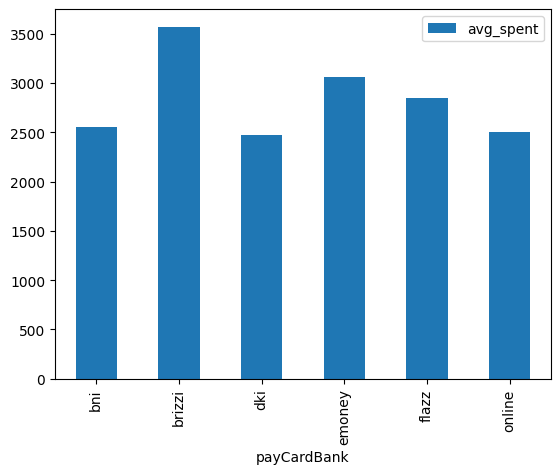

In [49]:
bank_stats = (df1.groupby('payCardBank')
                .agg(avg_spent=('payAmount','mean'),
                     trips=('transID','count'),
                     unique_users=('payCardName','nunique'))
                .reset_index())
bank_stats.plot(kind='bar', x='payCardBank', y='avg_spent')

### Spatial Density Mapping

In [50]:
import folium
from folium.plugins import HeatMap

heat_data = df1[['tapInStopsLat','tapInStopsLon']].values.tolist()
m = folium.Map(location=[-6.1751,106.8272], zoom_start=11)
HeatMap(heat_data, radius=10).add_to(m)
m

### Origin–Destination Network + HeatMap overlay

In [51]:
import pandas as pd
import networkx as nx
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Defensive copy
od_df = df1.copy()

# Ensure stop name columns exist
required_cols = ['tapInStopsName','tapOutStopsName',
                 'tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon']
missing_cols = [c for c in required_cols if c not in od_df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in df1: {missing_cols}")

# 1) Aggregate OD flows (weight = number of trips)
od_agg = (od_df
          .groupby(['tapInStopsName','tapOutStopsName',
                    'tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon'])
          .size()
          .reset_index(name='weight')
         )

# Drop self-loops if you want (optional)
od_agg = od_agg[od_agg['tapInStopsName'] != od_agg['tapOutStopsName']].reset_index(drop=True)

# 2) Build directed NetworkX graph
G = nx.DiGraph()
for _, row in od_agg.iterrows():
    src = row['tapInStopsName']
    dst = row['tapOutStopsName']
    w = int(row['weight'])
    # add nodes with coords as attributes (keep first encountered coords)
    if src not in G.nodes:
        G.add_node(src, lat=row['tapInStopsLat'], lon=row['tapInStopsLon'])
    if dst not in G.nodes:
        G.add_node(dst, lat=row['tapOutStopsLat'], lon=row['tapOutStopsLon'])
    # if edge already exists, sum weights (shouldn't if grouped)
    if G.has_edge(src, dst):
        G[src][dst]['weight'] += w
    else:
        G.add_edge(src, dst, weight=w)

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# 3) Compute simple centrality measures (degree and betweenness)
degree_cen = dict(G.degree(weight='weight'))       # weighted degree (in+out)
in_deg = dict(G.in_degree(weight='weight'))
out_deg = dict(G.out_degree(weight='weight'))
betw = nx.betweenness_centrality(G, weight='weight', normalized=True)

# Create dataframe for nodes ranking
nodes_df = pd.DataFrame([
    {'stop': n,
     'lat': G.nodes[n].get('lat'),
     'lon': G.nodes[n].get('lon'),
     'degree': degree_cen.get(n,0),
     'in_degree': in_deg.get(n,0),
     'out_degree': out_deg.get(n,0),
     'betweenness': betw.get(n,0)}
    for n in G.nodes()
])
nodes_df = nodes_df.sort_values('degree', ascending=False).reset_index(drop=True)
nodes_df.head(10)

# 4) Extract top K edges by weight for mapping
top_k = 30   # adjustable: how many top OD links to draw
edges_df = pd.DataFrame([ (u, v, d['weight']) for u,v,d in G.edges(data=True) ],
                        columns=['source','target','weight'])
edges_top = edges_df.sort_values('weight', ascending=False).head(top_k).reset_index(drop=True)
edges_top['source_lat'] = edges_top['source'].map(nodes_df.set_index('stop')['lat'])
edges_top['source_lon'] = edges_top['source'].map(nodes_df.set_index('stop')['lon'])
edges_top['target_lat'] = edges_top['target'].map(nodes_df.set_index('stop')['lat'])
edges_top['target_lon'] = edges_top['target'].map(nodes_df.set_index('stop')['lon'])
edges_top = edges_top.dropna(subset=['source_lat','source_lon','target_lat','target_lon']).reset_index(drop=True)

# 5) Build Folium map centered on Jakarta (or centroid of stops)
if nodes_df[['lat','lon']].dropna().shape[0] > 0:
    center = [nodes_df['lat'].median(), nodes_df['lon'].median()]
else:
    center = [-6.1751,106.8272]  # fallback
m = folium.Map(location=center, zoom_start=11, tiles='Cartodb Positron')

# 6) Add HeatMap for tap-in locations (all tap-in events, weighted by one)
heat_data = od_df[['tapInStopsLat','tapInStopsLon']].dropna().values.tolist()
HeatMap(heat_data, radius=8, blur=12, max_zoom=13).add_to(m)

# 7) Add top OD polylines with thickness proportional to weight
max_w = edges_top['weight'].max() if not edges_top.empty else 1
min_w = edges_top['weight'].min() if not edges_top.empty else 1
for _, r in edges_top.iterrows():
    line = [(r['source_lat'], r['source_lon']), (r['target_lat'], r['target_lon'])]
    # line thickness scaled (tweak multiplier as needed)
    weight = 1 + 8 * ((r['weight'] - min_w) / (max_w - min_w + 1e-9))
    folium.PolyLine(locations=line,
                    weight=weight,
                    color='crimson',
                    opacity=0.7,
                    tooltip=f"{r['source']} → {r['target']}: {r['weight']} trips"
                   ).add_to(m)
    # add small circle markers for endpoints for clarity
    folium.CircleMarker(location=(r['source_lat'], r['source_lon']),
                        radius=2,
                        color='blue',
                        fill=True,
                        fill_opacity=0.6).add_to(m)
    folium.CircleMarker(location=(r['target_lat'], r['target_lon']),
                        radius=2,
                        color='green',
                        fill=True,
                        fill_opacity=0.6).add_to(m)

# 8) Add a layer with top nodes labeled (optional)
for _, nr in nodes_df.head(20).iterrows():
    folium.CircleMarker([nr['lat'], nr['lon']],
                        radius=4 + (nr['degree'] / (nodes_df['degree'].max()+1))*6,
                        color='darkblue',
                        fill=True, fill_opacity=0.8,
                        popup=f"{nr['stop']} (deg={int(nr['degree'])}, bw={nr['betweenness']:.3f})").add_to(m)

# 9) Save or display map
# In Colab this will render; use m.save('od_network_map.html') to export
m

Nodes: 3473, Edges: 4060


## Dashboard

Berikut contoh dashboard sederhana untuk menampilkan:

- Pilihan halte
- Grafik tap-in per jam
- Grafik tap-in per hari
- Peta heatmap

In [52]:
!pip install gradio plotly folium --quiet

import gradio as gr
import pandas as pd
import plotly.express as px
import folium
from folium.plugins import HeatMap

df = df1.copy()  # asumsi df1 sudah ada dari notebook Anda
df['tapInHour'] = df['tapInTime'].dt.hour

def plot_hourly(stop):
    d = df[df['tapInStopsName'] == stop]
    g = d.groupby('tapInHour').size().reset_index(name='count')
    fig = px.bar(g, x='tapInHour', y='count', title=f"Hourly Tap-In at {stop}")
    return fig

def plot_daily(stop):
    d = df[df['tapInStopsName'] == stop]
    g = d.groupby('tapDay').size().reset_index(name='count')
    fig = px.bar(g, x='tapDay', y='count', title=f"Daily Tap-In at {stop}")
    return fig

def show_map():
    m = folium.Map(location=[-6.1751,106.8272], zoom_start=11)
    heat_data = df[['tapInStopsLat','tapInStopsLon']].dropna().values.tolist()
    HeatMap(heat_data).add_to(m)
    return m._repr_html_()

stops = sorted(df['tapInStopsName'].unique())

ui = gr.Interface(
    fn=lambda stop: (plot_hourly(stop), plot_daily(stop), show_map()),
    inputs=gr.Dropdown(stops, label="Choose a Stop"),
    outputs=[
        gr.Plot(label="Hourly Distribution"),
        gr.Plot(label="Daily Distribution"),
        gr.HTML(label="Heatmap"),
    ],
    title="TransJakarta Dashboard (Python + Gradio)"
)

ui.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://649f1a59069382cb5a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
